# Flights Data Exploration Challenge
In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [1]:
import pandas as pd

df_flights = pd.read_csv('../data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

**Year**: The year of the flight (all records are from 2013)
**Month**: The month of the flight
**DayofMonth**: The day of the month on which the flight departed
**DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
**Carrier**: The two-letter abbreviation for the airline.
**OriginAirportID**: A unique numeric identifier for the departure airport
**OriginAirportName**: The full name of the departure airport
**OriginCity**: The departure airport city
**OriginState**: The departure airport state
**DestAirportID**: A unique numeric identifier for the destination airport
**DestAirportName**: The full name of the destination airport
**DestCity**: The destination airport city
**DestState**: The destination airport state
**CRSDepTime**: The scheduled departure time
**DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
**DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
**CRSArrTime**: The scheduled arrival time
**ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
**ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
**Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    * Identify any null or missing data, and impute appropriate replacement values.
    * Identify and eliminate any outliers in the DepDelay and ArrDelay columns.

---
### 0. Preparation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 1. Missing value

In [2]:
# Identify any null or missing columns
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [3]:
# Identify rows contains null or missing value
df_flights[df_flights.isnull().any(axis=1)]['DepDel15']

171      NaN
359      NaN
429      NaN
545      NaN
554      NaN
          ..
271410   NaN
271607   NaN
271634   NaN
271671   NaN
271885   NaN
Name: DepDel15, Length: 2761, dtype: float64

In [4]:
# replace missing value of DepDel15 to 0.0
df_flights['DepDel15'] = df_flights['DepDel15'].fillna(0.0)
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

### 2. Clean Outliers

Get the distribution of data

DepDelay 
Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00



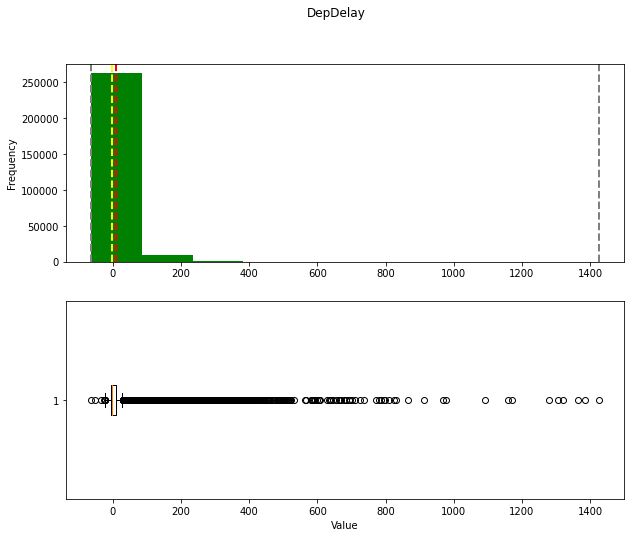

DepDelay 
Minimum:-11.00
Mean:1.49
Median:-1.00
Mode:-3.00
Maximum:36.00



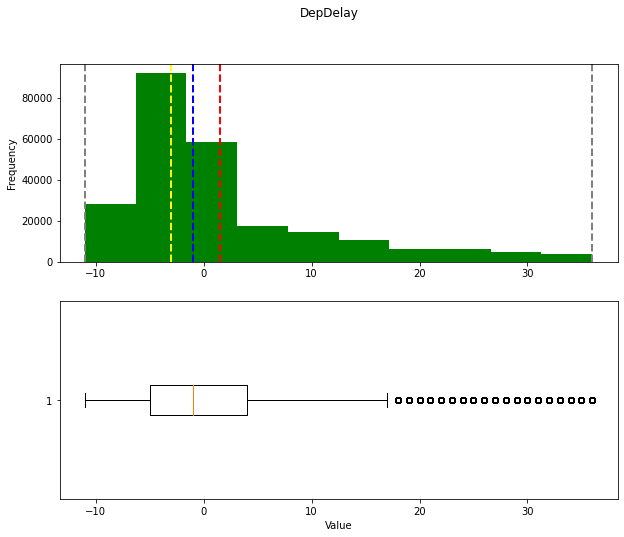

DepDelay 
Minimum:-11.00
Mean:1.49
Median:-1.00
Mode:-3.00
Maximum:36.00



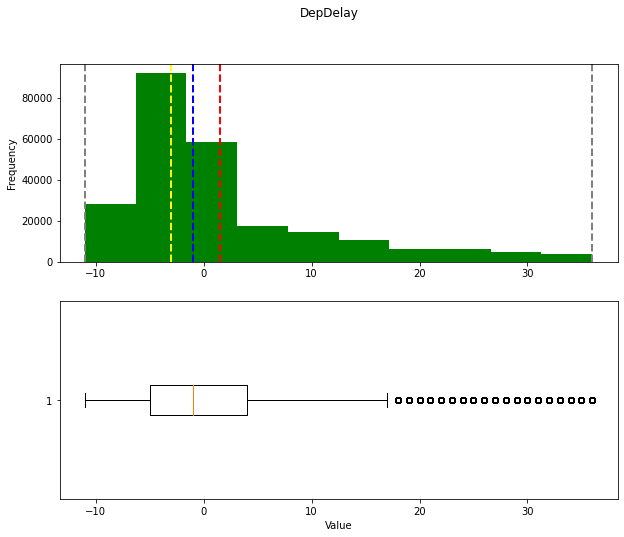

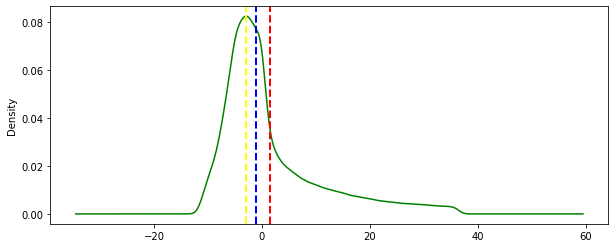

ArrDelay 
Minimum:-75.00
Mean:-2.50
Median:-4.00
Mode:0.00
Maximum:186.00



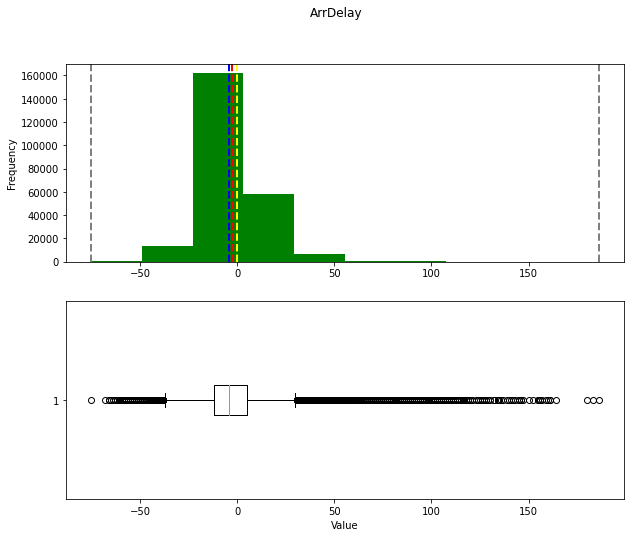

ArrDelay 
Minimum:-32.00
Mean:-5.68
Median:-6.00
Mode:0.00
Maximum:16.00



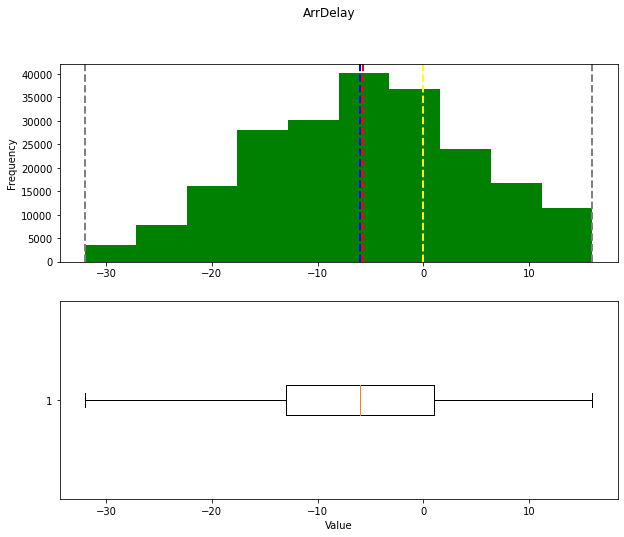

ArrDelay 
Minimum:-32.00
Mean:-5.68
Median:-6.00
Mode:0.00
Maximum:16.00



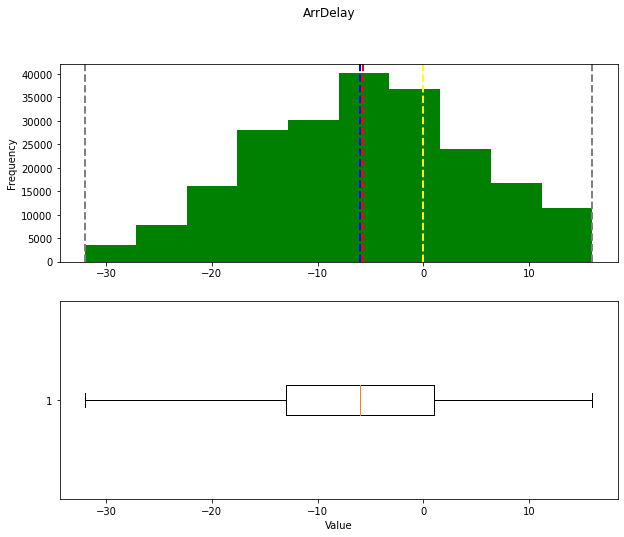

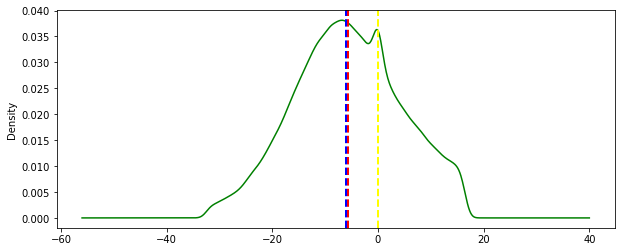

In [10]:
from shared_code.utils import *

# The features to examine
delay_field = ['DepDelay', 'ArrDelay']

for feature in delay_field:

    # plot the distribution
    show_distribution(df_flights[feature])

    # exclude outliers
    df_flights = trim_outliers_minimum(df_flights, feature, 0.01)
    df_flights = trim_outliers_maximum(df_flights, feature, 0.90)

    # plot the distribution without outliers
    show_distribution(df_flights[feature])

    # plot the density functions
    show_density(df_flights[feature])

The density distribution of departure delay is right skewed. After trimming the outliers, the range of departure delay
time went from 11 minutes early to 36 minutes delayed. Most of the flights depart between 1 minute and 3 minutes
earlier. Some long delays such as 36 minutes makes the density distribution a long tail to the right, thereby pulling the
delay to an average of 1.49 minutes.

Delay in arrival time is the opposite of departure. Most flights arrive on time. There are some very fast flight
which arriving 32 minutes earlier makes the average arrival time 5.68 minutes earlier.

## Explore the data

2. Explore the cleaned data.
    * View summary statistics for the numeric fields in the dataset.
    * Determine the distribution of the DepDelay and ArrDelay columns.
    * Use statistics, aggregate functions, and visualizations to answer the following questions:
        * What are the average (mean) departure and arrival delays?
        * How do the carriers compare in terms of arrival delay performance?
        * Is there a noticable difference in arrival delays for different days of the week?
        * Which departure airport has the highest average departure delay?
        * Do late departures tend to result in longer arrival delays than on-time departures?
        * Which route (from origin airport to destination airport) has the most late arrivals?
        * Which route has the highest average arrival delay?
        * Add markdown and code cells as required to create your solution.

In [ ]:
df_flights.describe()

### What are the average (mean) departure and arrival delays?
The average departure delay is 0.13 minutes earlier. The average arrival delay is 5.68 minutes earlier.

In [ ]:
df_flights[delay_field].mean()


### How do the carriers compare in terms of arrival delay performance?

There are 6 airlines have departure delays before. They are AA, F9, FL, UA, VX and WN. The remaining airlines performed well.
The average departure delay of all the airlines are below 0. That means the average level of all the airlines is to take off on time.
WN has a highest departure delay.

The arrival delay happened on most of the airlines. Except for 9E, DL, EV and UA, they haven't any arrival delay so far.
The average level of all the airlines is to arrive on time.

In [ ]:
for feature in delay_field:
    df_flights.boxplot(feature, by='Carrier', figsize=(10, 8))

### Is there a noticable difference in arrival delays for different days of the week?

There is on definitely differences among days of the week on average level of departure delay. It seems that depareture
delay are more likely to occur on Monday, Thursday, and Sunday.

The differences in arrival delay in a week is not obvious. Saturday might have all the flights arrive on time.

In [ ]:
for feature in delay_field:
    df_flights.boxplot(feature, by='DayOfWeek', figsize=(10, 8))

Which departure airport has the highest average departure delay?

Chicago Midway International airport has the highest average departure delay.

In [ ]:
# departure delay
airport_average_delay = df_flights.groupby('OriginAirportName')['DepDelay'].mean().sort_values(ascending=False)

# plot departure delay group by airport name
fig = plt.figure(figsize=(10, 20))

plt.bar(x=airport_average_delay.index, height=airport_average_delay.values, color='green')

plt.title('Departure Delay of Each Airport')
plt.xlabel('Airports')
plt.ylabel('Departure Delay')
plt.xticks(rotation=90)

plt.show()

Do late departures tend to result in longer arrival delays than on-time departures?

From the boxplot, it is obvious that the flight with a departure delay have a higher possibility of arrival delay.

In [ ]:
# identify is delay or not
df_flights['is_delay'] = df_flights['DepDelay'] > 0

# plot arrival delays group by is_delay
df_flights.boxplot('ArrDelay', by='is_delay', figsize=(10, 8))

Which route (from origin airport to destination airport) has the most late arrivals?

In [ ]:
# add a route columns
df_flights['route'] = df_flights['OriginAirportName'] + ' -> ' + df_flights['DestAirportName']

# get route flight time
df_flights.groupby('route')['ArrDel15'].sum().sort_values(ascending=False)

Which route has the highest average arrival delay?

In [ ]:
# get route flight time
df_flights.groupby('route')['ArrDelay'].mean().sort_values(ascending=False)